## Python Exercise : Preprocessing

Use data "sms_spam_collection.csv" <br>
Preprocessing step 1
1. lowercase
2. contraction
3. remove number or convert number
4. remove punctuation
5. remove stopwords
6. combine preoprocessing method

Preprocessing step 2
1. stemming
2. lemmatization
3. made DTM (tf or tf-id)

In [1]:
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np

contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

def to_lower(text):
    return text.lower()

def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

def to_strip(text):
    return " ".join(text.split())



In [2]:
df = pd.read_csv('data/sms_spam_collection.csv')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Prep step 1

Preprocessing step 1
1. lowercase
2. contraction
3. remove number or convert number
4. remove punctuation
5. remove stopwords
6. combine preoprocessing method

In [3]:
# lowercase
text_str = "Summer December 10th 2019"
text_string = to_lower("Summer December 10th 2019")
print(text_string)

summer december 10th 2019


In [4]:
# contraction
print(main_contraction("you're done it"))

you are done it


In [5]:
# remove number 
text_string = "I was born in 1996"
text_string = remove_numbers(text_string)
print(text_string)

I was born in 


In [6]:
# remove puntuation
text_str = "I am happy that you are here."
text_str = remove_punct(text_str)
print(text_str)

I am happy that you are here


In [7]:
# remove white space
text_string = "There   was      bobby, alex, fergie and I"
text_string = to_strip(text_string)
print(text_string)

There was bobby, alex, fergie and I


In [8]:
# remove stopword and particular

# kamus
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62812\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62812\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\62812\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [10]:
text_string = "I turned it off"
text_string = remove_stopwords(text_string)
print(text_string)

I turned


### Apply all method

In [11]:
pd.options.display.max_colwidth = None

In [12]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [13]:
df['msg_prep1'] = df['message'].apply(to_lower)
df['msg_prep2'] = df['msg_prep1'].apply(main_contraction)
df['msg_prep3'] = df['msg_prep2'].apply(remove_numbers)
df['msg_prep4'] = df['msg_prep3'].apply(remove_punct)
df['msg_prep5'] = df['msg_prep4'].apply(to_strip)
df['msg_prep6'] = df['msg_prep5'].apply(remove_stopwords)
df

,label,message,msg_prep1,msg_prep2,msg_prep3,msg_prep4,msg_prep5,msg_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the £ pound prize. claim is easy, call now! only p per minute. bt-national-rate.",this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate,this is the nd time we have tried contact u u have won the £ pound prize claim is easy call now only p per minute btnationalrate,nd time tried contact u u £ pound prize claim easy call p per minute btnationalrate
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,will ü b going to esplanade fr home,ü b going esplanade fr

### Prep 2

Preprocessing step 2
1. stemming
2. lemmatization
3. made DTM (tf or tf-id)

In [14]:
# stemming
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [15]:
text_string = "i am reading a book and the book is very fascinating"
text_string = stem(text_string)
print(text_string)

i am read a book and the book is veri fascin


In [16]:
# Lemmatization
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62812\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
text_string = "there she goes. Here I am"
text_string = lemmatize(text_string)
print(text_string)

there she go . Here I am


#### Apply all method

In [18]:
df['msg_prep_stem'] = df['msg_prep6'].apply(stem)
df['msg_prep_lemma'] = df['msg_prep6'].apply(lemmatize)
df[['msg_prep_stem','msg_prep_lemma']]

,msg_prep_stem,msg_prep_lemma
0,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goe usf live around though,nah think go usf life around though
...,...,...
5567,nd time tri contact u u £ pound prize claim easi call p per minut btnationalr,nd time tried contact u u £ pound prize claim easy call p per minute btnationalrate
5568,ü b go esplanad fr home,ü b going esplanade fr home
5569,piti mood soani suggest,pity mood soany suggestion
5570,guy bitch act like interest buy someth els next week gave us free,guy bitching acted like interested buying something else next week gave u free


### DTM

DTM-TF

In [19]:
words_sample = ['fun learn fun','can do all day', 'hate feel']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vect = CountVectorizer()
vect.fit(words_sample)

CountVectorizer()

In [22]:
vect.vocabulary_

{'fun': 5,
 'learn': 7,
 'can': 1,
 'do': 3,
 'all': 0,
 'day': 2,
 'hate': 6,
 'feel': 4}

In [23]:
len(vect.vocabulary_)

8

In [24]:
dtm = vect.transform(words_sample)
dtm.toarray()

array([[0, 0, 0, 0, 0, 2, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

In [25]:
vect.get_feature_names()

['all', 'can', 'day', 'do', 'feel', 'fun', 'hate', 'learn']

In [26]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
dtm_df

,all,can,day,do,feel,fun,hate,learn
0,0,0,0,0,0,2,0,1
1,1,1,1,1,0,0,0,0
2,0,0,0,0,1,0,1,0


DTM: TF-IDF

In [27]:
words_sample = ['fun learn fun','can do all day', 'hate feel']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vect = TfidfVectorizer()
vect.fit(words_sample)

TfidfVectorizer()

In [30]:
dtm_tf_idf = vect.transform(words_sample)

In [31]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), columns=vect.get_feature_names())
dtm_tf_idf

,all,can,day,do,feel,fun,hate,learn
0,0.0,0.0,0.0,0.0,0.000000,0.894427,0.000000,0.447214
1,0.5,0.5,0.5,0.5,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.707107,0.000000,0.707107,0.000000


## Python Exercise : Text Exploration

Use cleaned text from previous exercise:
- Generate word freq
- Generate word cloud
- Compare length of sentence

In [32]:
import seaborn as sns

### Word Frequency

In [33]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [34]:
df_kamus = kamus(df['msg_prep_lemma'])

<AxesSubplot:ylabel='kata'>

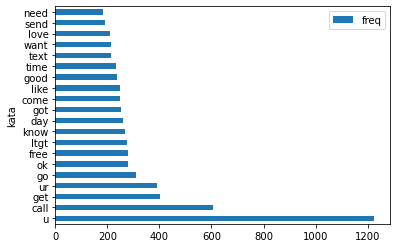

In [35]:
df_kamus[:20].plot(kind='barh')

### Word Cloud

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [38]:
word_cloud = WordCloud().generate(str(df['msg_prep_lemma']))

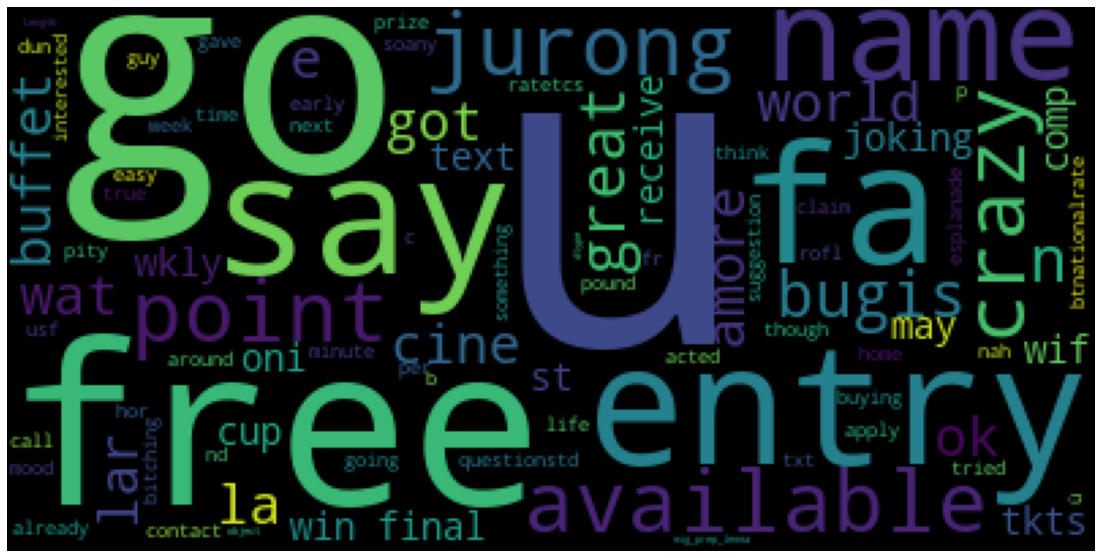

In [39]:
plot_cloud(word_cloud)

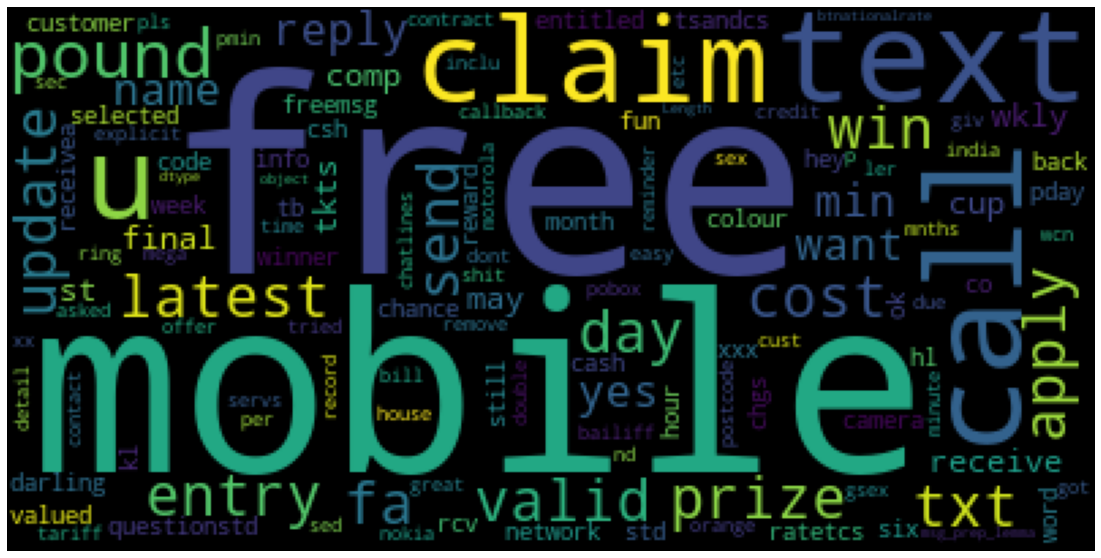

In [40]:
word_cloud = WordCloud().generate(str(df[df['label'] == 'spam']['msg_prep_lemma']))
plot_cloud(word_cloud)

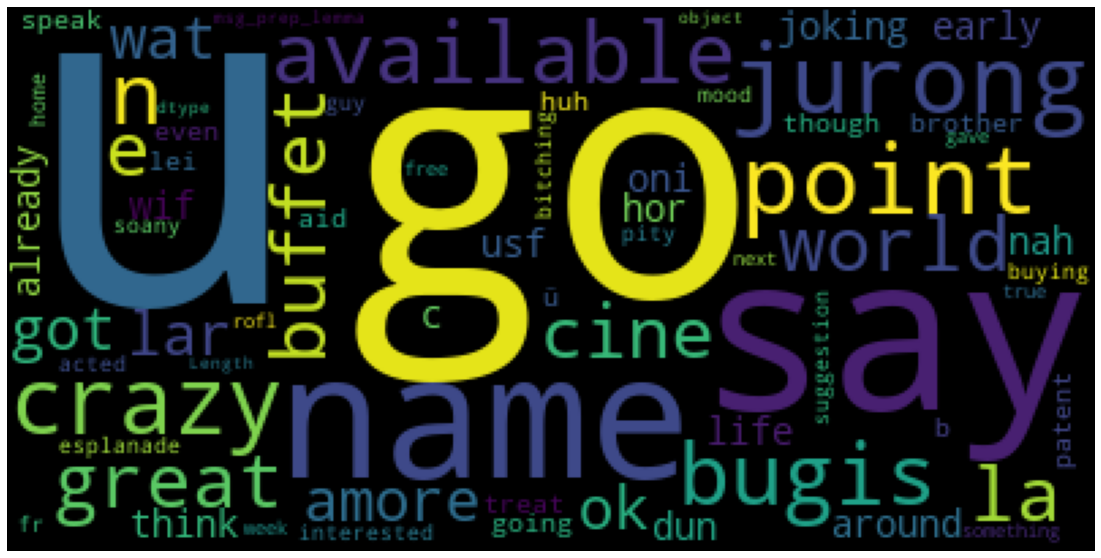

In [41]:
word_cloud = WordCloud().generate(str(df[df['label'] == 'ham']['msg_prep_lemma']))
plot_cloud(word_cloud)

### Word Cloud 2

In [42]:
import numpy as np
from PIL import Image

In [43]:
mask = np.array(Image.open('data/coba.png'))

In [44]:
# wordcloud = WordCloud(
#     width = 3000, 
#     height = 2000, 
#     random_state=1, 
#     background_color='white', 
#     colormap='Set2', 
#     collocations=False, 
#     stopwords = stopwords.words('english'),
#     mask=mask).generate(str(df[df['label']=='ham']['msg_prep_lemma']))
# plot_cloud(wordcloud)

### Length of Sentence

In [45]:
df['length']=df['message'].apply(len)

C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


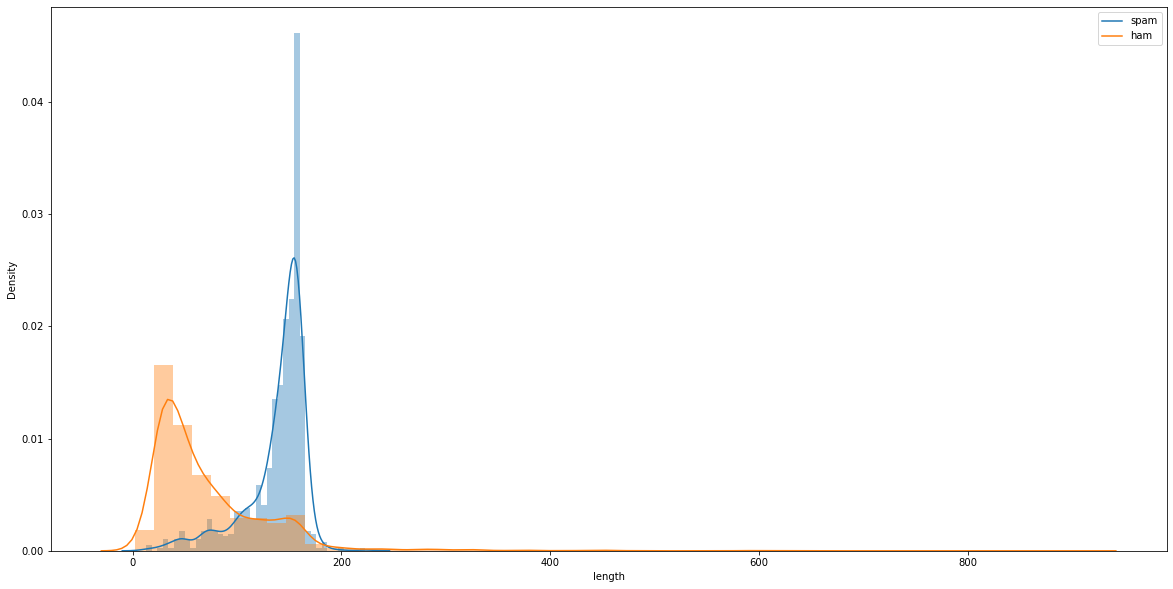

In [46]:
df_sms_spam = df[df['label']=='spam']
df_sms_ham = df[df['label']=='ham']

plt.figure(figsize=(20,10))
sns.distplot(df_sms_spam['length'])
sns.distplot(df_sms_ham['length'])

plt.legend(['spam','ham'])
plt.show()

pola:
- spam cenderung panjang text nya
- ham cenderung lbh pendek textnya

## Python Exercise : Text Classification

Use cleaned text from previous exxercise to build a text classification model:
1. Build a benchmark model: logistic regression, random forest, boosting
2. Optimize C in logistic regression (accuracy and 5 fold CV)
3. Compare the model before and after hyperparameter tuning

### Data Splitting

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
text = df['msg_prep_lemma']
y = np.where(df['label']=='spam',1,0)

In [49]:
text_train, text_test, y_train,y_test = train_test_split(
    text,
    y,
    stratify=y,
    random_state=10
)

### Preparation

In [50]:
df_tf = CountVectorizer()
x_train = df_tf.fit_transform(text_train)
x_test = df_tf.transform(text_test)

In [51]:
df_tf.get_feature_names()

['aah',
 'aaniye',
 'aaooooright',
 'aathilove',
 'aathiwhere',
 'abdomen',
 'abeg',
 'abelu',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abuser',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accomodate',
 'accomodations',
 'accordingly',
 'accordinglyor',
 'account',
 'accumulation',
 'achanammarakheshqatar',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'aclpm',
 'acnt',
 'acoentry',
 'across',
 'acsmsrewards',
 'act',
 'acted',
 'actin',
 'acting',
 'action',
 'activ',
 'activate',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'acwicmbcktzr',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit',
 'adore',
 'adoring',


In [52]:
len(df_tf.get_feature_names())

6715

### Model Benchmark

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [54]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [55]:
x_train

<4179x6715 sparse matrix of type '<class 'numpy.int64'>'
	with 33333 stored elements in Compressed Sparse Row format>

In [56]:
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       0.99      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [58]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
skfold = StratifiedKFold(n_splits=5)
cv = cross_val_score(rf, x_train, y_train, scoring='f1')
print(cv, cv.mean(), cv.std())

[0.83505155 0.90196078 0.90291262 0.87437186 0.86868687] 0.8765967360096105 0.025017512370110715


In [60]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1206
           1       0.99      0.82      0.89       187

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [61]:
# Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [62]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
y_pred = ada.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1206
           1       0.91      0.79      0.84       187

    accuracy                           0.96      1393
   macro avg       0.94      0.89      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [64]:
gradient = GradientBoostingClassifier()
gradient.fit(x_train, y_train)

GradientBoostingClassifier()

In [65]:
y_pred = gradient.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1206
           1       0.93      0.73      0.82       187

    accuracy                           0.96      1393
   macro avg       0.95      0.86      0.90      1393
weighted avg       0.96      0.96      0.95      1393



In [66]:
xg = XGBClassifier()
xg.fit(x_train,y_train)

C:\Users\62812\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred = xg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1206
           1       0.94      0.84      0.89       187

    accuracy                           0.97      1393
   macro avg       0.96      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393



**paling tinggi Logistic regression**

### Hyperparameter Tuning

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [69]:
dtm_tf_idf = TfidfVectorizer()
model = LogisticRegression()
pipe_model = Pipeline([
    ('prep',dtm_tf_idf),
    ('clf',model)
])

hyperparam_space = {
    'clf__C':[1000,100,10,1,0.1,0.01,0.001]
}

skf = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    pipe_model,
    param_grid = hyperparam_space,
    cv=skf,
    n_jobs = -1
)

In [70]:
grid_search.fit(text_train, y_train)

C:\Users\62812\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001]})

In [71]:
grid_search.best_score_

0.9782239349053091

In [72]:
grid_search.best_params_

{'clf__C': 1000}

In [73]:
y_pred = logreg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       0.99      0.87      0.93       187

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [74]:
y_pred2 = grid_search.best_estimator_.predict(text_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       0.98      0.92      0.95       187

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393

